In [1]:
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from src.clean_data import clean_data

In [13]:
data = pd.read_json('data/data.json')
# data = clean_data(data)
data['has_prev_payouts'] = data['previous_payouts'].apply(len)
data['max_price'] = (data['ticket_types']
                     .apply(lambda x: max([ticket['cost'] for ticket in x]) if isinstance(x, list) and len(x) > 0 else 0))
data['fraud'] = data['acct_type'].apply(lambda x: 1 if 'fraud' in x else 0)

In [14]:
data.head(5)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,has_prev_payouts,max_price,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,0,550.00,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,49,35.00,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,36,93.51,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None,21,25.00,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,49,200.00,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [26]:
data.dropna(subset=['country'],inplace=True)

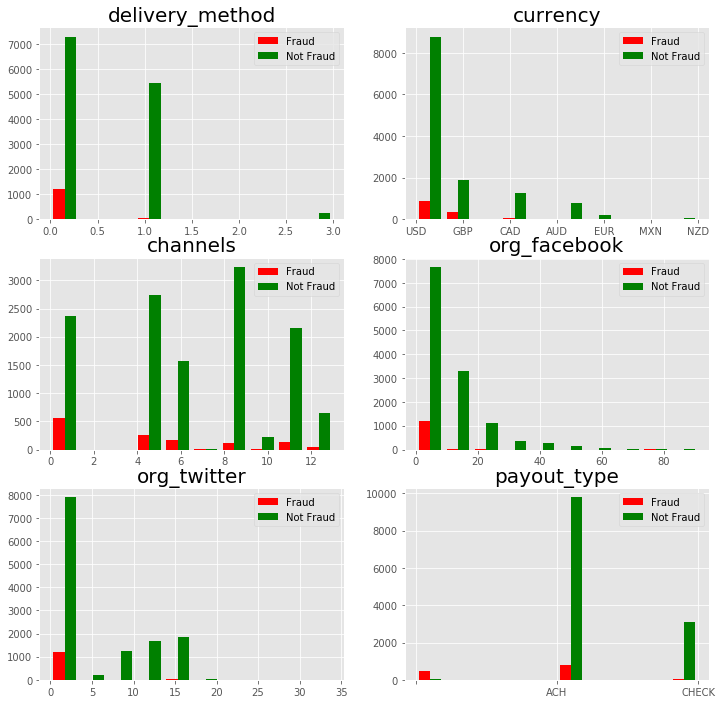

In [47]:
fig, axs = plt.subplots(3,2,figsize=(12,12))
features = ['delivery_method', 'currency', 'channels','org_facebook','org_twitter', 'payout_type']

for i, ax in enumerate(axs.flatten()):
    ax.hist([data.loc[data['fraud'] == x, features[i]] for x in [1,0]], label=['Fraud','Not Fraud'], color=['r','g']);
    ax.legend();
    ax.set_title(features[i], fontsize=20);

fig.savefig('images/fraud_hist.png', bbox_inches='tight')

In [163]:
data.loc[:,['user_type', 'fraud']].groupby('user_type').describe()

fraud                                             
            count      mean       std  min  25%  50%  75%  max
user_type                                                     
1          3738.0  0.248261  0.432062  0.0  0.0  0.0  0.0  1.0
2             1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
3          7520.0  0.039229  0.194152  0.0  0.0  0.0  0.0  1.0
4          3017.0  0.021876  0.146303  0.0  0.0  0.0  0.0  1.0
5            59.0  0.050847  0.221572  0.0  0.0  0.0  0.0  1.0
103           2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

In [165]:
data.loc[:,['delivery_method', 'fraud']].groupby('delivery_method').describe()

fraud                                             
                  count      mean       std  min  25%  50%  75%  max
delivery_method                                                     
0.0              8520.0  0.140962  0.348003  0.0  0.0  0.0  0.0  1.0
1.0              5554.0  0.013144  0.113900  0.0  0.0  0.0  0.0  1.0
3.0               247.0  0.028340  0.166279  0.0  0.0  0.0  0.0  1.0

In [167]:
data.loc[:,['org_twitter', 'fraud']].groupby('org_twitter').describe()

fraud                                             
              count      mean       std  min  25%  50%  75%  max
org_twitter                                                     
0.0          9121.0  0.132661  0.339226  0.0  0.0  0.0  0.0  1.0
2.0            38.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3.0             5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4.0            30.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5.0            62.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6.0           131.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
7.0           188.0  0.005319  0.072932  0.0  0.0  0.0  0.0  1.0
8.0           317.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9.0           332.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
10.0          446.0  0.006726  0.081830  0.0  0.0  0.0  0.0  1.0
11.0          509.0  0.001965  0.044324  0.0  0.0  0.0  0.0  1.0
12.0          613.0  0.003263  0.057073  0.0  0.0  0.0  0.0  1.0
13.0          589.0  0.011885  0.108459  0.0  0.0  0.0  0.0  1.0
14.0          667.0  0.016492  0.127452  0.0  0.0  0.0  0.0  1.0
15.0          847.0  0.001181  0.034360  0.0  0.0  0.0  0.0  1.0
16.0          354.0  0.005650  0.075058  0.0  0.0  0.0  0.0  1.0
17.0           12.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
18.0            4.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
19.0            1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
20.0            3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
21.0            2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
23.0            6.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
34.0            1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0

In [168]:
data.loc[:,['org_facebook', 'fraud']].groupby('org_facebook').describe()

fraud                                             
               count      mean       std  min  25%  50%  75%  max
org_facebook                                                     
0.0           8097.0  0.145115  0.352239  0.0  0.0  0.0  0.0  1.0
3.0              2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4.0              3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5.0             58.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6.0             96.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
...              ...       ...       ...  ...  ...  ...  ...  ...
81.0             5.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
83.0             2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
85.0             1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
88.0             1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
91.0             3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

[81 rows x 8 columns]

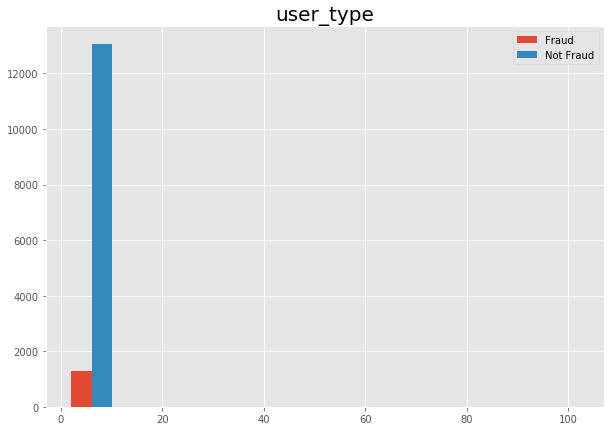

In [115]:
types = data['fraud'].unique()
fig, ax = plt.subplots(figsize=(10,7))
ax.hist([data.loc[data['fraud'] == x, 'user_type'] for x in types], label=['Fraud','Not Fraud']);
ax.legend();
ax.set_title('user_type', fontsize=20);

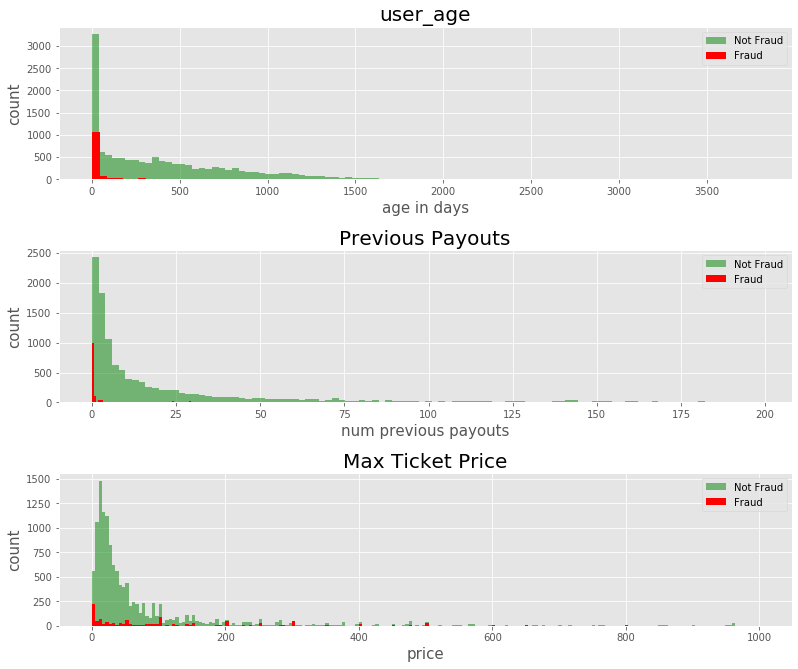

In [48]:
fig, ax = plt.subplots(3,1,figsize=(12,10))
fig.tight_layout(pad=5.0)

ax[0].hist(data[(data['fraud'] == 0) & (data['user_age'] < 20000)]['user_age'], bins=100, label='Not Fraud', alpha=.5, color='g');
ax[0].hist(data[(data['fraud'] == 1) & (data['user_age'] < 20000)]['user_age'], bins=50, label='Fraud', color='r');
ax[0].set_title('user_age', fontsize=20);
ax[0].set_xlabel('age in days', fontsize=15);
ax[0].set_ylabel('count', fontsize=15);
ax[0].legend();

ax[1].hist(data[(data['fraud'] == 0) & (data['has_prev_payouts'] < 200)]['has_prev_payouts'], bins=100, label='Not Fraud', alpha=.5, color='g');
ax[1].hist(data[(data['fraud'] == 1) & (data['has_prev_payouts'] < 200)]['has_prev_payouts'], bins=50, label='Fraud', color='r');
ax[1].set_title('Previous Payouts', fontsize=20);
ax[1].set_xlabel('num previous payouts', fontsize=15);
ax[1].set_ylabel('count', fontsize=15);
ax[1].legend();

ax[2].hist(data[(data['fraud'] == 0) & (data['max_price'] < 1000)]['max_price'], bins=200, label='Not Fraud', alpha=.5, color='g');
ax[2].hist(data[(data['fraud'] == 1) & (data['max_price'] < 1000)]['max_price'], bins=200, label='Fraud', color='r');
ax[2].set_title('Max Ticket Price', fontsize=20);
ax[2].set_xlabel('price', fontsize=15);
ax[2].set_ylabel('count', fontsize=15);
ax[2].legend();

fig.savefig('images/fraud_counts.png', bbox_inches='tight')

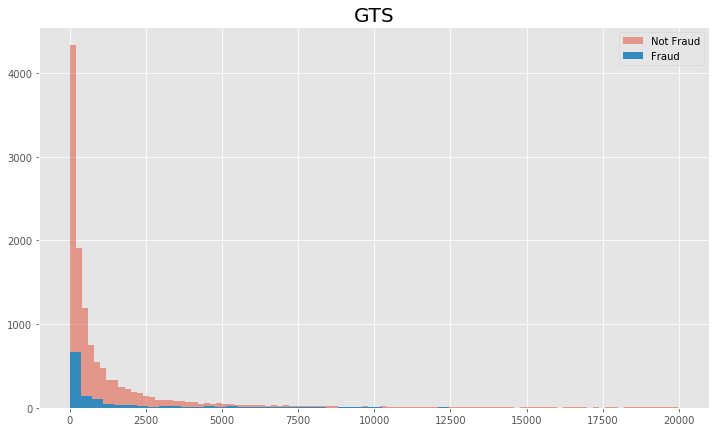

In [107]:
fig, ax = plt.subplots(figsize=(12,7))

ax.hist(data[(data['fraud'] == 0) & (data['gts'] < 20000)]['gts'], bins=100, label='Not Fraud', alpha=.5);
ax.hist(data[(data['fraud'] == 1) & (data['gts'] < 20000)]['gts'], bins=50, label='Fraud');
ax.set_title('GTS', fontsize=20);
ax.set_xlabel('');
ax.legend();

In [103]:
print(len(data[data['fraud'] == 0]['email_domain'].unique()))
print(len(data[data['fraud'] == 1]['email_domain'].unique()))
data[data['fraud'] == 1]['email_domain'].unique()

5667
134


array(['gmail.com', 'hotmail.com', 'cox.net', 'hotmail.co.uk',
       'yahoo.com', 'ymail.com', 'inbox.com', 'zumba-perth.com',
       'Safe-mail.net', 'yopmail.com', 'aol.com', 'diversity-church.com',
       'comcast.net', 'yahoo.co.uk', 'yahoo.ca', '19sieunhan.com',
       'mail.com', '4asdkids.com', 'emgay.com', 'live.com', 'outlook.com',
       'maroclancers.com', 'hotmail.fr', 'lidf.co.uk', 'gcase.org',
       'checker.vn', 'The2Half.com', 'petlover.com', 'rocketmail.com',
       'aol.co.uk', 'jcclain.com', 'yahoo.fr', 'live.fr', 'yahoo.com.vn',
       'yahoo.de', 'qip.ru', 'rock.com', 'att.net', 'lmtexformula.com',
       'chef.net', 'ovidcapita.com', 'instructor.net', 'quaychicago.com',
       'thinktankconsultancy.com', '9and1.biz', 'GMAIL.COM',
       'startupmaroc.com', 'msn.com', 'consultant.com', 'hotmail.de',
       'ultimatewine.co.uk', 'yahoo.it', 'me.com', 'safe-mail.net',
       'europe.com', 'ioccupied.net', 'gmx.com', 'investocorp.com',
       'ashfordradtech.org', '